In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# 1) Delivery_time -> Predict delivery time using sorting time

In [2]:
df1=pd.read_csv('/content/delivery_time.csv')

In [3]:
df1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<Axes: >

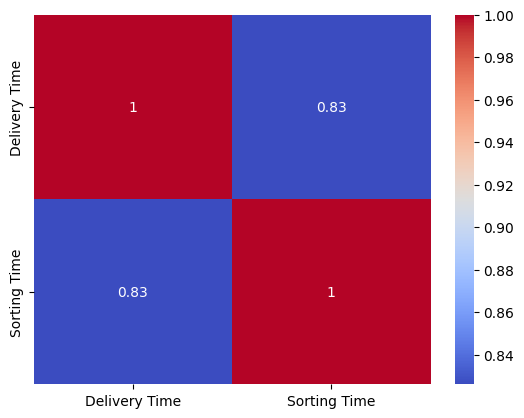

In [29]:
corr_matrix = df1.iloc[:,[0,1]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
 # Sorting Time is highly correlated to Delivery Time as corr = 0.83

array([[<Axes: title={'center': 'Delivery Time'}>,
        <Axes: title={'center': 'Sorting Time'}>]], dtype=object)

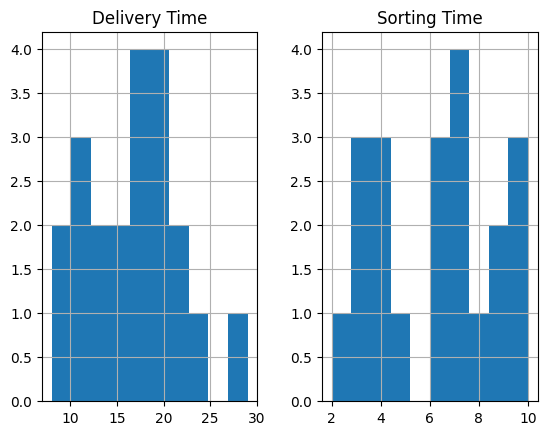

In [5]:
df1.hist() # looks like there are outliers in delivery column

<Axes: >

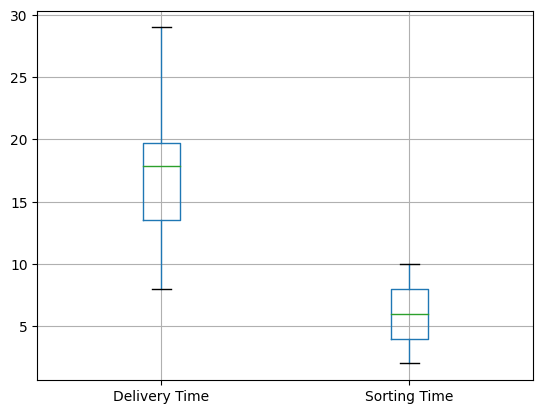

In [6]:
# check for outliers ==> visualisation method
df1.boxplot()

#from plot=> there are no outliers in any column

In [7]:
df1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
# check for outliers ==> statistical method
# IQR = Q3- Q1
IQR1 = df1.describe().iloc[6][0] - df1.describe().iloc[4][0]
max_11=df1.describe().iloc[6][0] + 1.5* IQR1
min_11=df1.describe().iloc[4][0] - 1.5* IQR1

print(f'minimum and maximum allowed range is between ({min_11}, {max_11})')

if df1.iloc[:,0].max() < max_11 and df1.iloc[:,0].min() > min_11:
  print('there is no outliers in Delivery Time column')
else:
  print('there are outliers, please treat it')

minimum and maximum allowed range is between (4.125, 29.125)
there is no outliers in Delivery Time column


In [9]:
# IQR = Q3- Q1
IQR2 = df1.describe().iloc[6][1] - df1.describe().iloc[4][1]
max_12=df1.describe().iloc[6][1] + 1.5* IQR1
min_12=df1.describe().iloc[4][1] - 1.5* IQR1

print(f'minimum and maximum allowed range is between ({min_12}, {max_12})')

if df1.iloc[:,1].max() < max_12 and df1.iloc[:,1].min() > min_12:
  print('there is no outliers in Sorting Time column')
else:
  print('there are outliers, please treat it')

minimum and maximum allowed range is between (-5.375, 17.375)
there is no outliers in Sorting Time column


In [10]:
df1.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### as there is no outlier in any column and whole data is all clean, so we can proceed to build linear regression model

In [11]:
# We have to find out delivery time (target variable) based on sorting time (independent variable)
# X = sorting time (independent variable)
X= df1[['Sorting Time']]
X.head()

,Sorting Time
0,10
1,4
2,6
3,9
4,10


In [12]:
# y = delivery time (target variable)
y= df1['Delivery Time']
y.head(1)

0    21.0
Name: Delivery Time, dtype: float64

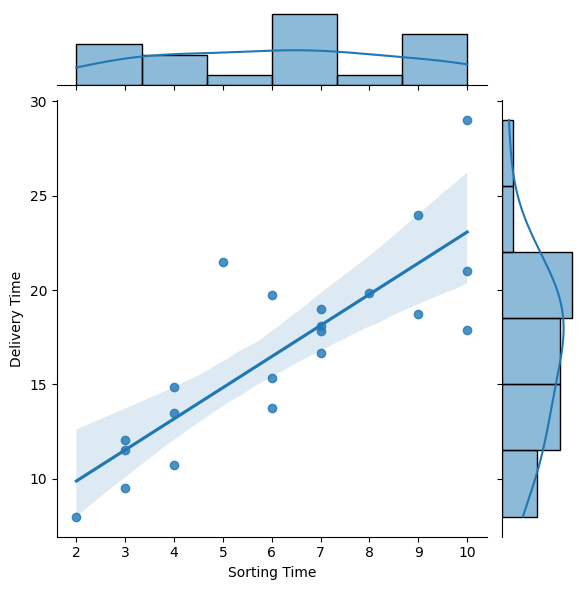

In [15]:
sns.jointplot(data=df1, x= 'Sorting Time', y = 'Delivery Time', kind='reg')

In [13]:
# Simple Linear Model Accuracy
# splitting of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# call linear regression model
from sklearn.linear_model import LinearRegression
lreg= LinearRegression()

# fitting of training data to model
lreg.fit(X_train, y_train)

# prediction
y_pred_train=lreg.predict(X_train)
y_pred_test=lreg.predict(X_test)

In [16]:

# import r2_score to check for accuracy of model
from sklearn.metrics import r2_score
score_train=r2_score(y_train, y_pred_train)
score_test=r2_score(y_test, y_pred_test)

print('Training Accuracy is: ', score_train)
print('Testing Accuracy is: ', score_test)


Training Accuracy is:  0.7539121518197861
Testing Accuracy is:  -0.1477340438763639


Negative R-squared Score: The R-squared score, which measures the goodness of fit of a regression model, can be negative when the model's performance is worse than a horizontal line. In other words, the model is performing so poorly that it's better to use a simple mean value as a predictor. A negative R-squared indicates that the model is not capturing the underlying patterns in the data.

#
Base_Model= average model => when model is predicted based on average of data
Any other ML algo model must produce accuracy better than based model i.e. average model, if not, then change the model

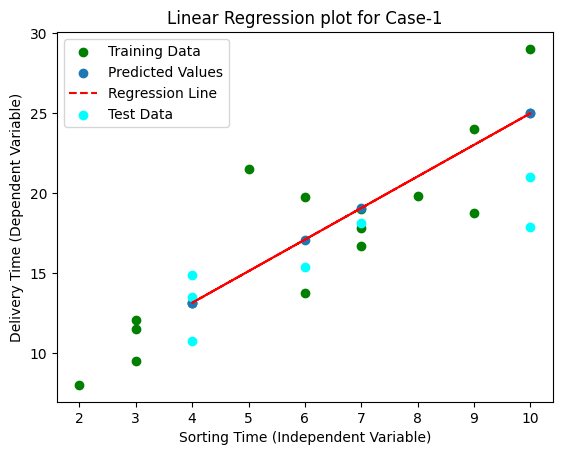

In [17]:
# Plotting
plt.scatter(X_train, y_train, c='g', label='Training Data')
plt.scatter(X_test, y_pred_test, label='Predicted Values')
plt.plot(X_test, y_pred_test, '--r', label='Regression Line')
plt.scatter(X_test, y_test, c='cyan', label='Test Data')
plt.xlabel('Sorting Time (Independent Variable)')
plt.ylabel('Delivery Time (Dependent Variable)')
plt.title('Linear Regression plot for Case-1')
plt.legend()

# Transformation based on scaling

In [18]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
mm_scaler = MinMaxScaler()

In [19]:

# Simple Linear Model Accuracy based on Standard scaling
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

lreg.fit(X_train_std, y_train)

y_pred_std_train=lreg.predict(X_train_std)
y_pred_std_test=lreg.predict(X_test_std)

score_std_train=r2_score(y_train, y_pred_std_train)
score_std_test=r2_score(y_test, y_pred_std_test)


In [20]:

# Simple Linear Model Accuracy based on Robust Scaling
X_train_rob = rob_scaler.fit_transform(X_train)
X_test_rob = rob_scaler.transform(X_test)

lreg.fit(X_train_rob, y_train)

y_pred_rob_train=lreg.predict(X_train_rob)
y_pred_rob_test=lreg.predict(X_test_rob)

score_rob_train=r2_score(y_train, y_pred_rob_train)
score_rob_test=r2_score(y_test, y_pred_rob_test)


In [21]:

# Simple Linear Model Accuracy based on Minmax scaling
X_train_mm = mm_scaler.fit_transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

lreg.fit(X_train_mm, y_train)

y_pred_mm_train=lreg.predict(X_train_mm)
y_pred_mm_test=lreg.predict(X_test_mm)

score_mm_train=r2_score(y_train, y_pred_mm_train)
score_mm_test=r2_score(y_test, y_pred_mm_test)

## Transformation based on logarithmic, exponential, quadratic

### Logarithmic transformation

In [22]:
X= df1[['Sorting Time']]
y= df1['Delivery Time']
X_log = np.log(X)

X_train, X_test, y_train, y_test = train_test_split(X_log,y, test_size=0.3, random_state=42)

lreg.fit(X_train, y_train)

y_pred_log_train=lreg.predict(X_train)
y_pred_log_test=lreg.predict(X_test)

score_log_train=r2_score(y_train, y_pred_log_train)
score_log_test=r2_score(y_test, y_pred_log_test)

### Exponential transformation

In [23]:
X= df1[['Sorting Time']]
y= df1['Delivery Time']
y_log=np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X,y_log, test_size=0.3, random_state=42)

lreg.fit(X_train, y_train)

y_pred_log_train=lreg.predict(X_train)
y_pred_exp_train=np.exp(y_pred_log_train)
y_pred_log_test=lreg.predict(X_test)
y_pred_exp_test=np.exp(y_pred_log_test)

score_exp_train=r2_score(np.exp(y_train), y_pred_exp_train)
score_exp_test=r2_score(np.exp(y_test), y_pred_exp_test)

### Quadratic transformation

In [24]:
X= df1[['Sorting Time']]
y= df1['Delivery Time']
X_square=X**2
X_quad= pd.concat([X, X_square], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_quad,y, test_size=0.3, random_state=42)

lreg.fit(X_train, y_train)

y_pred_quad_train=lreg.predict(X_train)
y_pred_quad_test=lreg.predict(X_test)

score_quad_train=r2_score(y_train, y_pred_quad_train)
score_quad_test=r2_score(y_test, y_pred_quad_test)

In [25]:
accuracy_data=pd.DataFrame({'Model':['Train_Score','Test_Score'],
                            'Simple_Model':[score_train, score_test],
                            'Standard_Scaling':[score_std_train, score_std_test],
                            'Robust_Scaling':[score_rob_train, score_rob_test],
                            'MinMax_Scaling':[score_mm_train, score_mm_test],
                            'Logarithmic_Transformation':[score_log_train, score_log_test],
                            'Exponential_Transformation':[score_exp_train, score_exp_test],
                            'Quadratic_Transformation':[score_quad_train, score_quad_test]
                            }).T

accuracy_data.columns = accuracy_data.iloc[0]
accuracy_data = accuracy_data[1:]

# Transformation to polynomial features


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X= df1[['Sorting Time']]
y= df1['Delivery Time']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


# Create a pipeline with polynomial features and linear regression
degrees = [3, 4, 5, 6, 7, 8, 9, 10]  # Different polynomial degrees to try
score_poly_train = []
score_poly_test = []

for degree in degrees:
    poly_reg = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_reg', LinearRegression())
    ])

    poly_reg.fit(X_train, y_train)

    y_pred_train = poly_reg.predict(X_train)
    y_pred_test = poly_reg.predict(X_test)


    score_poly_train.append(r2_score(y_train, y_pred_quad_train))
    score_poly_test.append(r2_score(y_test, y_pred_quad_test))

poly_df = pd.DataFrame({'Model': degrees, 'Train_Score': score_poly_train, 'Test_Score': score_poly_test})
poly_accuracy=poly_df.set_index('Model')



In [27]:
Model_Accuracies = pd.concat([accuracy_data, poly_accuracy])
Model_Accuracies

,Train_Score,Test_Score
Simple_Model,0.753912,-0.147734
Standard_Scaling,0.753912,-0.147734
Robust_Scaling,0.753912,-0.147734
MinMax_Scaling,0.753912,-0.147734
Logarithmic_Transformation,0.736523,0.195067
Exponential_Transformation,0.74695,-0.734831
Quadratic_Transformation,0.754455,-0.224393
3,0.754455,-0.224393
4,0.754455,-0.224393
5,0.754455,-0.224393


# As there is no effect of scaling and also of any polynomial transformations on test accuracy, so out of all option we can take logaritmic model as good model, though its accuracy is still debatable.

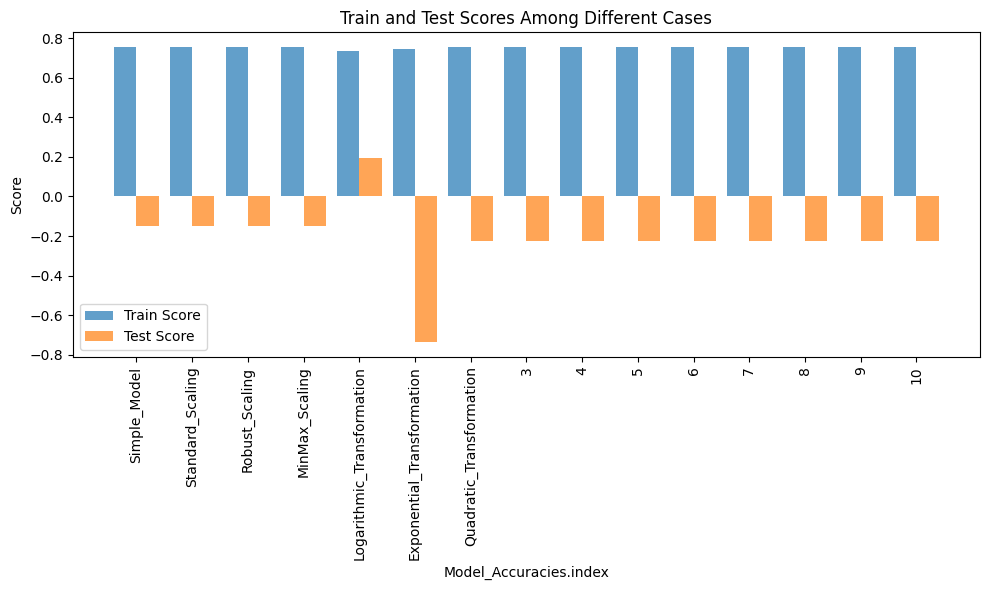

In [28]:
train_scores = Model_Accuracies.Train_Score
test_scores = Model_Accuracies.Test_Score
x = range(len(Model_Accuracies.index))
plt.figure(figsize=(10, 6))
plt.bar(x, train_scores, width=0.4, label='Train Score', align='center', alpha=0.7)
plt.bar([i + 0.4 for i in x], test_scores, width=0.4, label='Test Score', align='center', alpha=0.7)

# Customize the plot
plt.xlabel('Model_Accuracies.index')
plt.ylabel('Score')
plt.title('Train and Test Scores Among Different Cases')
plt.xticks([i + 0.2 for i in x], Model_Accuracies.index, rotation='vertical')

plt.legend()

# Show the plot
plt.tight_layout()

-------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------


#

#2) Salary_hike -> Build a prediction model for Salary_hike

In [30]:
df2=pd.read_csv('/content/Salary_Data.csv')

In [31]:
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [32]:
df2.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

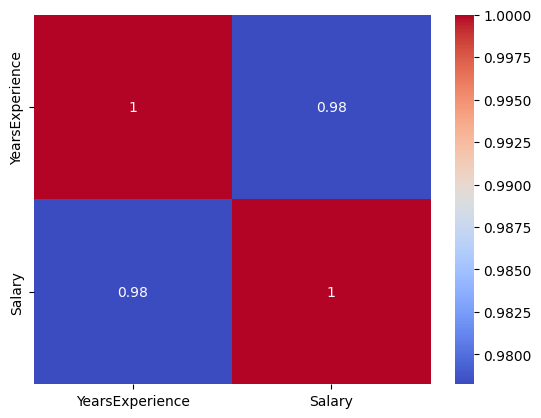

In [57]:
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

YearsExperience is very highly correlated to Salary

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

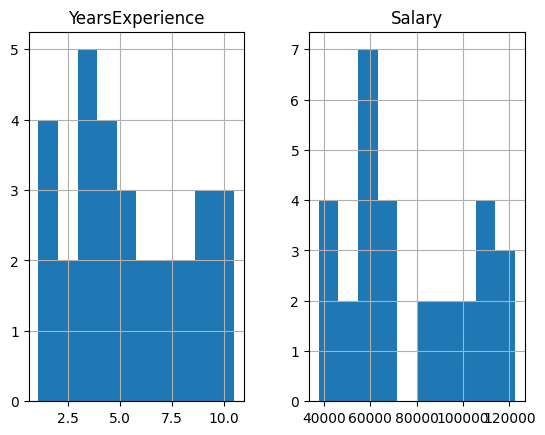

In [33]:
df2.hist()

In [34]:
df2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: >

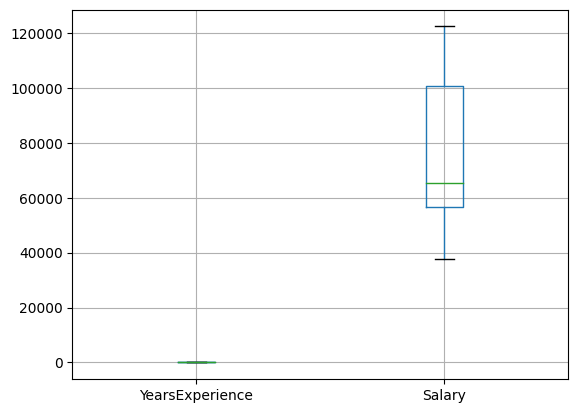

In [35]:
# check for outliers in YearsExperience column
df2.boxplot()

<Axes: >

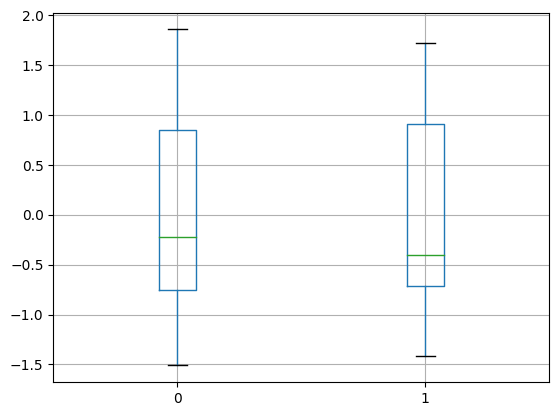

In [36]:
# perform any scaling then see box plot to get better picture

from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
nf2_std = std_scaler.fit_transform(df2)
df2_std = pd.DataFrame(nf2_std)
df2_std.boxplot()

there are no outliers in any of the columns

### as there is no outlier in any column and whole data is all clean, there is no need of EDA process to perform, so we can proceed to build linear regression model

In [39]:
# We have to find out Salary (target variable) based on YearsExperience (independent variable)
# X = YearsExperience (independent variable)
X2= df2[['YearsExperience']]
X2.head(1)

,YearsExperience
0,1.1


In [40]:
# y = Salary (target variable)
y2= df2['Salary']
y2.head(1)

0    39343.0
Name: Salary, dtype: float64

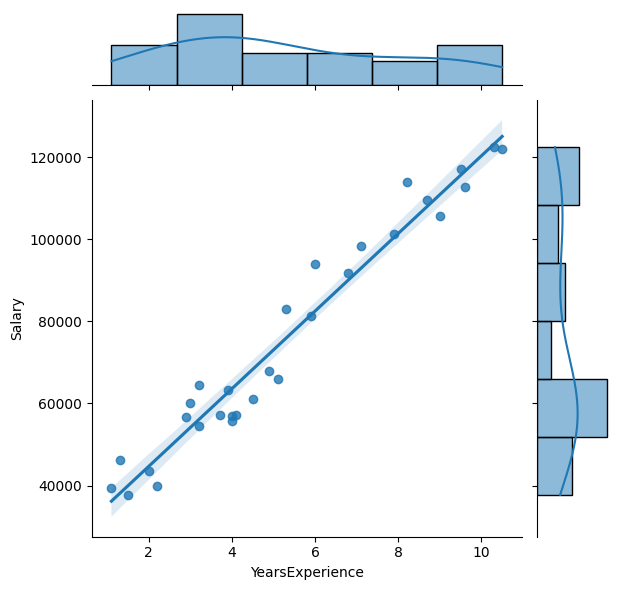

In [41]:
sns.jointplot(data=df2,x='YearsExperience',y='Salary',kind='reg')

In [42]:
# Simple Linear Model Accuracy
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=0.3, random_state=42)

lreg.fit(X_train, y_train)

y_pred_train=lreg.predict(X_train)
y_pred_test=lreg.predict(X_test)

score_train=r2_score(y_train, y_pred_train)
score_test=r2_score(y_test, y_pred_test)

print(f'for my linear regression model\n Train accuracy is {score_train*100:.2f} % and \n test accuracy is {score_test*100:.2f} %')



for my linear regression model
 Train accuracy is 95.75 % and 
 test accuracy is 94.14 %


## this linear regression model is having very good accuracy

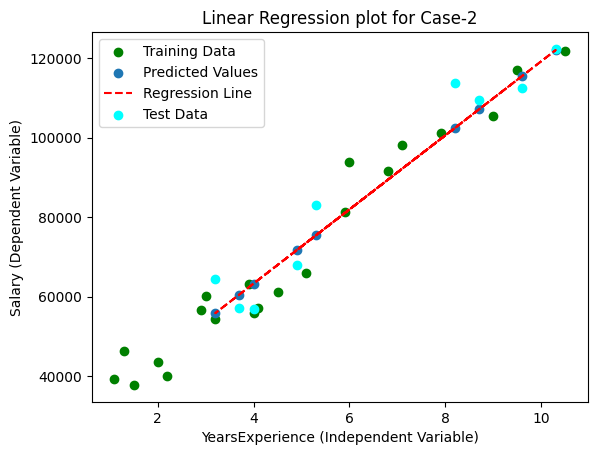

In [43]:
# Plotting
plt.scatter(X_train, y_train, c='g', label='Training Data')
plt.scatter(X_test, y_pred_test, label='Predicted Values')
plt.plot(X_test, y_pred_test, '--r', label='Regression Line')
plt.scatter(X_test, y_test, c='cyan', label='Test Data')
plt.xlabel('YearsExperience (Independent Variable)')
plt.ylabel('Salary (Dependent Variable)')
plt.title('Linear Regression plot for Case-2')
plt.legend()

In [45]:
import plotly.express as px
import plotly.graph_objects as go

px.scatter(df2, x='YearsExperience', y='Salary', color='Salary', trendline="ols")

#Transformation based on scaling

In [46]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
mm_scaler = MinMaxScaler()

In [47]:
X2= df2[['YearsExperience']]
y2= df2['Salary']
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=0.3, random_state=42)

# Simple Linear Model Accuracy based on Standard
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

lreg.fit(X_train_std, y_train)

y_pred_std_train=lreg.predict(X_train_std)
y_pred_std_test=lreg.predict(X_test_std)

score_std_train=r2_score(y_train, y_pred_std_train)
score_std_test=r2_score(y_test, y_pred_std_test)


In [48]:

# Simple Linear Model Accuracy based on Robust Scaling
X_train_rob = rob_scaler.fit_transform(X_train)
X_test_rob = rob_scaler.transform(X_test)

lreg.fit(X_train_rob, y_train)

y_pred_rob_train=lreg.predict(X_train_rob)
y_pred_rob_test=lreg.predict(X_test_rob)

score_rob_train=r2_score(y_train, y_pred_rob_train)
score_rob_test=r2_score(y_test, y_pred_rob_test)


In [49]:

# Simple Linear Model Accuracy based on Minmax scaling
X_train_mm = mm_scaler.fit_transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

lreg.fit(X_train_mm, y_train)

y_pred_mm_train=lreg.predict(X_train_mm)
y_pred_mm_test=lreg.predict(X_test_mm)

score_mm_train=r2_score(y_train, y_pred_mm_train)
score_mm_test=r2_score(y_test, y_pred_mm_test)

## Transformation based on logarithmic, exponential, quadratic

In [50]:
# Logarithmic transformations

X2= df2[['YearsExperience']]
y2= df2['Salary']
X_log = np.log(X2)

X_train, X_test, y_train, y_test = train_test_split(X_log,y2, test_size=0.3, random_state=42)

lreg.fit(X_train, y_train)

y_pred_log_train=lreg.predict(X_train)
y_pred_log_test=lreg.predict(X_test)

score_log_train=r2_score(y_train, y_pred_log_train)
score_log_test=r2_score(y_test, y_pred_log_test)

In [51]:
# exponential transformations

X2= df2[['YearsExperience']]
y2= df2['Salary']
y_log=np.log(y2)

X_train, X_test, y_train, y_test = train_test_split(X2,y_log, test_size=0.3, random_state=42)

lreg.fit(X_train, y_train)

y_pred_log_train=lreg.predict(X_train)
y_pred_exp_train=np.exp(y_pred_log_train)
y_pred_log_test=lreg.predict(X_test)
y_pred_exp_test=np.exp(y_pred_log_test)

score_exp_train=r2_score(np.exp(y_train), y_pred_exp_train)
score_exp_test=r2_score(np.exp(y_test), y_pred_exp_test)

In [52]:
# quadratic transfrormations

X2= df2[['YearsExperience']]
y2= df2['Salary']
X_square=X2**2
X_quad= pd.concat([X2, X_square], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_quad,y2, test_size=0.3, random_state=42)

lreg.fit(X_train, y_train)

y_pred_quad_train=lreg.predict(X_train)
y_pred_quad_test=lreg.predict(X_test)

score_quad_train=r2_score(y_train, y_pred_quad_train)
score_quad_test=r2_score(y_test, y_pred_quad_test)

In [53]:
accuracy_data=pd.DataFrame({'Model':['Train_Score','Test_Score'],
                            'Simple_Model':[score_train, score_test],
                            'Standard_Scaling':[score_std_train, score_std_test],
                            'Robust_Scaling':[score_rob_train, score_rob_test],
                            'MinMax_Scaling':[score_mm_train, score_mm_test],
                            'Logarithmic_Transformation':[score_log_train, score_log_test],
                            'Exponential_Transformation':[score_exp_train, score_exp_test],
                            'Quadratic_Transformation':[score_quad_train, score_quad_test]
                            }).T

accuracy_data.columns = accuracy_data.iloc[0]
accuracy_data = accuracy_data[1:]

# Transformation to polynomial features


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X2= df2[['YearsExperience']]
y2= df2['Salary']
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=0.3, random_state=42)


# Create a pipeline with polynomial features and linear regression
degrees = [3, 4, 5, 6, 7, 8, 9, 10]  # Different polynomial degrees to try
score_poly_train = []
score_poly_test = []

for degree in degrees:
    poly_reg = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_reg', LinearRegression())
    ])

    poly_reg.fit(X_train, y_train)

    y_pred_train = poly_reg.predict(X_train)
    y_pred_test = poly_reg.predict(X_test)


    score_poly_train.append(r2_score(y_train, y_pred_quad_train))
    score_poly_test.append(r2_score(y_test, y_pred_quad_test))

poly_df = pd.DataFrame({'Model': degrees, 'Train_Score': score_poly_train, 'Test_Score': score_poly_test})
poly_accuracy=poly_df.set_index('Model')



In [55]:
Model_Accuracies = pd.concat([accuracy_data, poly_accuracy], axis=0)
Model_Accuracies

,Train_Score,Test_Score
Simple_Model,0.957453,0.941447
Standard_Scaling,0.957453,0.941447
Robust_Scaling,0.957453,0.941447
MinMax_Scaling,0.957453,0.941447
Logarithmic_Transformation,0.846276,0.804071
Exponential_Transformation,0.926995,0.885993
Quadratic_Transformation,0.957739,0.940545
3,0.957739,0.940545
4,0.957739,0.940545
5,0.957739,0.940545


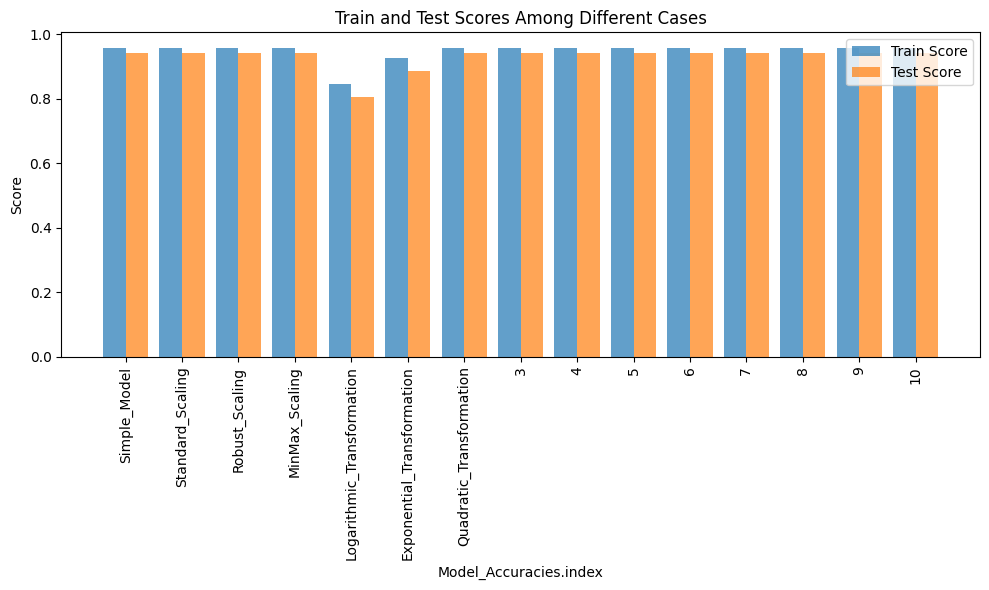

In [56]:
train_scores = Model_Accuracies.Train_Score
test_scores = Model_Accuracies.Test_Score
x = range(len(Model_Accuracies.index))
plt.figure(figsize=(10, 6))
plt.bar(x, train_scores, width=0.4, label='Train Score', align='center', alpha=0.7)
plt.bar([i + 0.4 for i in x], test_scores, width=0.4, label='Test Score', align='center', alpha=0.7)

# Customize the plot
plt.xlabel('Model_Accuracies.index')
plt.ylabel('Score')
plt.title('Train and Test Scores Among Different Cases')
plt.xticks([i + 0.2 for i in x], Model_Accuracies.index, rotation='vertical')

plt.legend()

# Show the plot
plt.tight_layout()

# Simple model is predicting best so it can be used for future predictions